In [70]:
import pandas as pd

columns_of_interest = ["No Finding", "Atelectasis", "Cardiomegaly", "Consolidation", "Edema", "Pleural Effusion", "Pneumonia", "Pneumothorax"] #"No Finding" is first column

import pandas as pd
def split_df(df): 
    from sklearn.model_selection import train_test_split

    # Ensure subject IDs are unique
    unique_subject_ids = df['subject_id'].unique()

    # Split the unique subject IDs into 80-10-10 proportions
    train_ids, temp_ids = train_test_split(unique_subject_ids, test_size=0.2, random_state=42)
    val_ids, test_ids = train_test_split(temp_ids, test_size=0.5, random_state=42)

    # Create splits by filtering the dataframe
    train_df = df[df['subject_id'].isin(train_ids)]
    val_df = df[df['subject_id'].isin(val_ids)]
    test_df = df[df['subject_id'].isin(test_ids)]

    # Add a "split" column
    train_df["split"] = "train"
    val_df["split"] = "val"
    test_df["split"] = "test"
    combined_df = pd.concat([train_df, val_df, test_df], ignore_index=True)
    return combined_df

def export_df(combined_df, name="mimic", include_nofinding=True): 
    for dfname in ["train", "val", "test"]:
        dftype = combined_df[combined_df.split == dfname]
        print(f"{dfname} split size: {len(dftype)}")
        filename = f"eight_{name}_" + dfname + ".txt"
        with open(filename, 'w') as file:
            for _, row in dftype.iterrows():
                # Construct the row string
                row[row == -1] = 0 
                ending = ".png" if name == "cxr8" else ".jpg"
                image_path = row["path"][:-4] + ending
                labels = " ".join(row[columns_of_interest].astype(int).astype(str))
                file.write(f"{image_path} {labels}\n")

    return combined_df 

# Start with MIMIC

In [71]:
df = pd.read_csv("/vol/ideadata/ed52egek/data/mimic/mimic_metadata_preprocessed.csv")
df = df[df["ViewPosition"].isin(["AP", "PA"])]

df = df.fillna(0)
df[df == -1] = 0
df = df[df[columns_of_interest].sum(axis=1) != 0]
df = split_df(df)

df = df[(df.split == "test") | (df[columns_of_interest].sum(axis=1) == 1)]

/tmp/ipykernel_335996/3055127573.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["split"] = "train"
/tmp/ipykernel_335996/3055127573.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df["split"] = "val"
/tmp/ipykernel_335996/3055127573.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [72]:
df_split = export_df(df, name="mimic")
df_split.to_csv("eight_mimic.csv")
df_split[df_split["split"] == "test"]

train split size: 91843
val split size: 11566
test split size: 16125


,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,...,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices,impression,Finding Label,Finding Labels
142684,baefd74a-8d35102f-01dd4d8c-6750860f-84ce6613,19994586.0,54820351.0,CHEST (PA AND LAT),PA,3056.0,2544.0,22000411.0,112314.453,CHEST (PA AND LAT),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,No acute cardiopulmonary process.,0.0,No Finding
142685,4a041077-47e39276-f45b2512-d183addf-be44b12f,19993776.0,58668196.0,CHEST (PORTABLE AP),AP,2544.0,3056.0,21350322.0,215342.703,CHEST (PORTABLE AP),...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Moderate congestive heart failure with moderat...,0.0,Atelectasis|Edema|Lung Opacity|Pleural Effusion
142686,a3b087d8-28f83e7d-f4120754-943d1fb3-34c07de6,19993776.0,57912514.0,CHEST (PA AND LAT),AP,2544.0,3056.0,21350704.0,213529.640,CHEST (PA AND LAT),...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Mild pulmonary edema with small bilateral pleu...,0.0,Edema|Pleural Effusion
142687,841c13b7-61d595b1-2547a071-84961857-b15de31c,19993776.0,56679343.0,CHEST (PORTABLE AP),AP,2539.0,3043.0,21350722.0,190304.953,CHEST (PORTABLE AP),...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"As compared to the previous radiograph, no rel...",0.0,Cardiomegaly|Support Devices
142688,44553556-7bd69f85-af039633-fcf9894d-8e4d9d1e,19990545.0,57156376.0,CHEST (PORTABLE AP),AP,3050.0,2539.0,21391014.0,131036.687,CHEST (PORTABLE AP),...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Heart size and mediastinum are stable. New ri...,0.0,Consolidation|Lung Opacity|Pneumonia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158804,926ca783-1abb560b-2e4efb96-6f0b25d8-4c8ee5ca,10760670.0,59575239.0,0,PA,1720.0,1486.0,21900329.0,101720.000,CHEST (PA AND LAT),...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1) Markedly improved right-sided pneumonia wit...,0.0,Lung Lesion|Lung Opacity|Pneumonia
158805,068144bb-0b4fa968-441e9426-44d8609a-2465f49e,10760670.0,56785501.0,CHEST (PORTABLE AP),AP,3056.0,2544.0,21921027.0,81104.218,CHEST (PORTABLE AP),...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiomediastinal silhouette is unchanged. Rig...,0.0,Consolidation|Lung Opacity
158806,6c3436b6-65eeb5bc-143c7787-8a551fb9-62dd5ce4,10760670.0,54827584.0,CHEST (PA AND LAT),AP,3056.0,2544.0,21900225.0,133115.890,CHEST (PA AND LAT),...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,Pulmonary edema with small bilateral pleural e...,0.0,Consolidation|Edema|Lung Opacity|Pleural Effus...
158807,aa1de98c-5b2943ac-7b348d9e-23424c11-71dd667b,10760670.0,53468449.0,CHEST (PORTABLE AP),AP,3056.0,2544.0,21900226.0,81820.109,CHEST (PORTABLE AP),...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Resolving pulmonary edema. Increasing density...,0.0,Edema|Lung Opacity|Pneumonia


# Chexpert

In [73]:
df = pd.read_csv("/vol/ideadata/ed52egek/data/chexpert/chexpertchestxrays-u20210408/CheXpert-v1.0/train.csv")
df = df[df["AP/PA"].isin(["AP", "PA"])]
df["subject_id"] = df["Path"].apply(lambda x: x.split("/")[2])
df = df.fillna(0)
df[df == -1] = 0
#df.sum(axis=1)
df = df.rename(columns={"Path":"path"})

df = df.drop(columns={"Support Devices"})
df = df[df[columns_of_interest].sum(axis=1) != 0]


df = split_df(df)

df = df[(df.split == "test") | (df[columns_of_interest].sum(axis=1) == 1)]

/tmp/ipykernel_335996/3055127573.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["split"] = "train"
/tmp/ipykernel_335996/3055127573.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df["split"] = "val"
/tmp/ipykernel_335996/3055127573.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [74]:
df_split = export_df(df, name="chexpert")
df_split.to_csv("eight_chexpert.csv")
df_split[df_split["split"] == "test"]

train split size: 71651
val split size: 8963
test split size: 15189


,path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,subject_id,split
136162,CheXpert-v1.0/train/patient00006/study1/view1_...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient00006,test
136163,CheXpert-v1.0/train/patient00040/study1/view1_...,Male,69,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,patient00040,test
136164,CheXpert-v1.0/train/patient00052/study1/view1_...,Female,72,Frontal,PA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,patient00052,test
136165,CheXpert-v1.0/train/patient00066/study1/view1_...,Male,61,Frontal,PA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient00066,test
136166,CheXpert-v1.0/train/patient00083/study1/view1_...,Female,85,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,patient00083,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151346,CheXpert-v1.0/train/patient64399/study1/view1_...,Female,62,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,patient64399,test
151347,CheXpert-v1.0/train/patient64404/study1/view1_...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,patient64404,test
151348,CheXpert-v1.0/train/patient64411/study1/view1_...,Female,65,Frontal,AP,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient64411,test
151349,CheXpert-v1.0/train/patient64434/study1/view1_...,Female,29,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient64434,test


# Chestxray-8

In [75]:
df = pd.read_csv("/vol/ideadata/ed52egek/data/chestxray14/Data_Entry_2017_v2020.csv")
# Split "Finding Labels" into multiple unique columns
labels = df["Finding Labels"].str.get_dummies(sep="|")
df = pd.concat([df, labels], axis=1)

# Update "Image Index" column and rename it to "path"
df["path"] = "images/" + df["Image Index"]
df = df.drop(columns=["Image Index"])

df = df.rename(columns={"Patient ID":"subject_id", "Effusion": "Pleural Effusion"})
df = df[df[columns_of_interest].sum(axis=1) != 0]


df = split_df(df)

df = df[(df.split == "test") | (df[columns_of_interest].sum(axis=1) == 1)]


df = df[["path", "Patient Age", "Patient Gender", "subject_id", "split"] + columns_of_interest]
df

/tmp/ipykernel_335996/3055127573.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["split"] = "train"
/tmp/ipykernel_335996/3055127573.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df["split"] = "val"
/tmp/ipykernel_335996/3055127573.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

,path,Patient Age,Patient Gender,subject_id,split,No Finding,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion,Pneumonia,Pneumothorax
0,images/00000001_000.png,57,M,1,train,0,0,1,0,0,0,0,0
1,images/00000001_001.png,58,M,1,train,0,0,1,0,0,0,0,0
3,images/00000002_000.png,80,M,2,train,1,0,0,0,0,0,0,0
4,images/00000005_000.png,69,F,5,train,1,0,0,0,0,0,0,0
5,images/00000005_001.png,69,F,5,train,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91772,images/00030773_001.png,9,M,30773,test,1,0,0,0,0,0,0,0
91773,images/00030785_000.png,30,M,30785,test,1,0,0,0,0,0,0,0
91774,images/00030787_000.png,33,M,30787,test,1,0,0,0,0,0,0,0
91775,images/00030788_000.png,60,F,30788,test,1,0,0,0,0,0,0,0


In [76]:
df_split = export_df(df, name="cxr8")
df_split.to_csv("eight_cxr8.csv")
df_split[df_split["split"] == "test"]

train split size: 67309


val split size: 8114
test split size: 8735


,path,Patient Age,Patient Gender,subject_id,split,No Finding,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion,Pneumonia,Pneumothorax
83042,images/00000006_000.png,81,M,6,test,1,0,0,0,0,0,0,0
83043,images/00000011_000.png,74,M,11,test,0,0,0,0,0,1,0,0
83044,images/00000011_001.png,74,M,11,test,1,0,0,0,0,0,0,0
83045,images/00000011_002.png,75,M,11,test,1,0,0,0,0,0,0,0
83046,images/00000011_003.png,75,M,11,test,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91772,images/00030773_001.png,9,M,30773,test,1,0,0,0,0,0,0,0
91773,images/00030785_000.png,30,M,30785,test,1,0,0,0,0,0,0,0
91774,images/00030787_000.png,33,M,30787,test,1,0,0,0,0,0,0,0
91775,images/00030788_000.png,60,F,30788,test,1,0,0,0,0,0,0,0


# EDA 

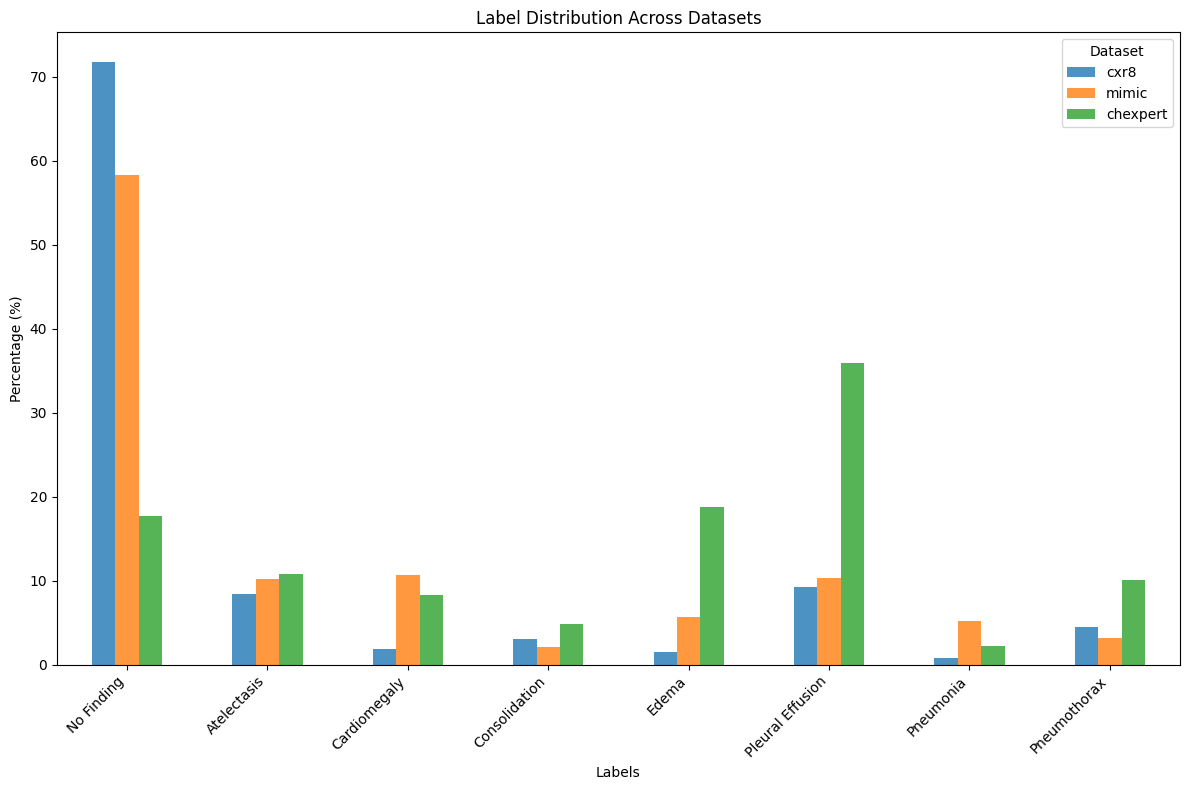

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
datasets = {
    "cxr8": pd.read_csv("eight_cxr8.csv"),
    "mimic": pd.read_csv("eight_mimic.csv"),
    "chexpert": pd.read_csv("eight_chexpert.csv"),
}


COLUMNS =  ["No Finding", "Atelectasis", "Cardiomegaly", "Consolidation", "Edema", "Pleural Effusion", "Pneumonia", "Pneumothorax"] 
import matplotlib.pyplot as plt


# Calculate label distributions
distribution_data = {}
for name, df in datasets.items():
    # Compute percentage of 1s for each label
    distribution_data[name] = df[COLUMNS].mean() * 100

# Convert to a DataFrame for visualization
distribution_df = pd.DataFrame(distribution_data)

# Plot the distributions as a grouped bar chart
distribution_df.plot(kind="bar", figsize=(12, 8), alpha=0.8)
plt.title("Label Distribution Across Datasets")
plt.xlabel("Labels")
plt.ylabel("Percentage (%)")
plt.legend(title="Dataset")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()